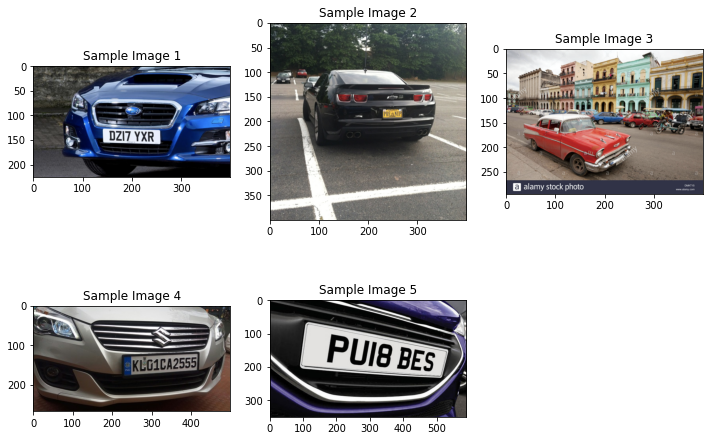

In [3]:
import random
import matplotlib.pyplot as plt
import cv2

# Define a list of image file paths
image_paths = [
    r'C:\Users\Maneka Wijesundara\Desktop\DLASS005\Dataset\train\Cars0.png',
    r'C:\Users\Maneka Wijesundara\Desktop\DLASS005\Dataset\train\Cars1.png',
    r'C:\Users\Maneka Wijesundara\Desktop\DLASS005\Dataset\train\Cars2.png',
    r'C:\Users\Maneka Wijesundara\Desktop\DLASS005\Dataset\train\Cars3.png',
    r'C:\Users\Maneka Wijesundara\Desktop\DLASS005\Dataset\train\Cars4.png',
    r'C:\Users\Maneka Wijesundara\Desktop\DLASS005\Dataset\train\Cars5.png'
]

# Display random sample images
sample_images = random.sample(image_paths, 5)

plt.figure(figsize=(12, 8))
for i, image_path in enumerate(sample_images):
    img = cv2.imread(image_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample Image {i+1}')
plt.show()


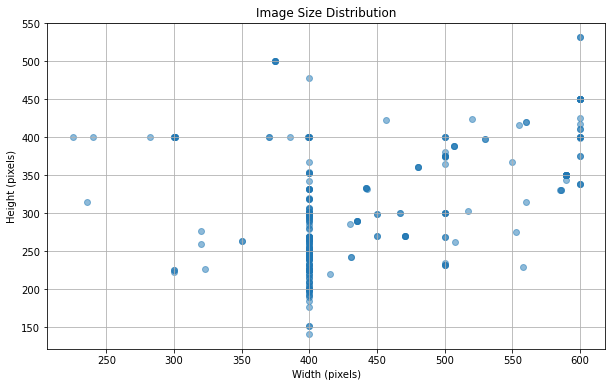

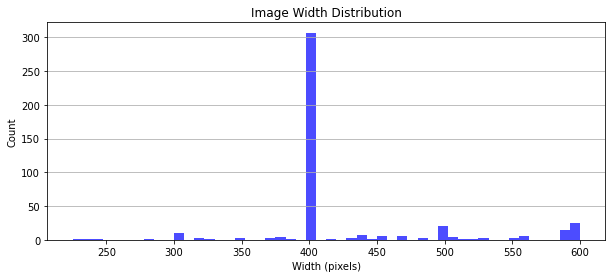

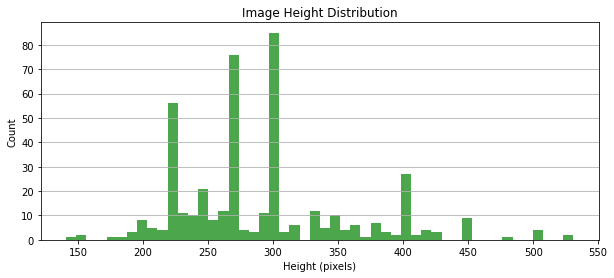

In [11]:
#d. Image Sizes: Create a histogram or scatter plot showing the distribution of image 
#sizes (height and width) to understand variations in image dimensions.
import os
import cv2
import matplotlib.pyplot as plt

# Define the path to your image dataset directory
dataset_dir = 'C:\\Users\\Maneka Wijesundara\\Desktop\\DLAssignment\\images'

# Initialize lists to store image dimensions
heights = []
widths = []

# Iterate through the images in the dataset directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Filter for image file extensions
        image_path = os.path.join(dataset_dir, filename)
        img = cv2.imread(image_path)
        h, w, _ = img.shape  # Get height and width
        heights.append(h)
        widths.append(w)

# Create a scatter plot of image dimensions
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Size Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)

# Create a histogram of image widths
plt.figure(figsize=(10, 4))
plt.hist(widths, bins=50, color='blue', alpha=0.7)
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')
plt.grid(axis='y')

# Create a histogram of image heights
plt.figure(figsize=(10, 4))
plt.hist(heights, bins=50, color='green', alpha=0.7)
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()


In [18]:
#print relevant sattributes of image
import json

# Load the dataset from a JSON file
dataset_json = {
    "Cars0.png181641": {
        "filename": "Cars0.png",
        "size": 181641,
        "regions": [
            {
                "shape_attributes": {
                    "name": "polyline",
                    "all_points_x": [230, 231, 426, 421, 226],
                    "all_points_y": [124, 181, 170, 121, 127]
                },
                "region_attributes": {
                    "names": "numberPlate"
                }
            }
        ],
        "file_attributes": {}
    },
    "Cars1.png541584": {
        "filename": "Cars1.png",
        "size": 541584,
        "regions": [
            {
                "shape_attributes": {
                    "name": "polyline",
                    "all_points_x": [138, 134, 259, 260, 136],
                    "all_points_y": [125, 160, 157, 127, 128]
                },
                "region_attributes": {
                    "names": "numberPlate"
                }
            }
        ],
        "file_attributes": {}
    }
}

# Assuming your dataset is already in the desired format

# Iterate through the dataset, assuming it's a dictionary
for entry_id, entry_data in dataset_json.items():
    # Access individual attributes or annotations within each entry
    filename = entry_data.get('filename', '')
    size = entry_data.get('size', 0)
    regions = entry_data.get('regions', [])

    # Print or process the data as needed
    print(f"Entry ID: {entry_id}")
    print(f"Filename: {filename}")
    print(f"Size: {size}")
    for region in regions:
        shape_attributes = region.get('shape_attributes', {})
        region_attributes = region.get('region_attributes', {})

        # Access shape attributes
        shape_name = shape_attributes.get('name', '')
        all_points_x = shape_attributes.get('all_points_x', [])
        all_points_y = shape_attributes.get('all_points_y', [])

        # Access region attributes
        region_name = region_attributes.get('names', '')

        # Print or process the data as needed
        print(f"Shape Name: {shape_name}")
        print(f"All Points X: {all_points_x}")
        print(f"All Points Y: {all_points_y}")
        print(f"Region Name: {region_name}")


Entry ID: Cars0.png181641
Filename: Cars0.png
Size: 181641
Shape Name: polyline
All Points X: [230, 231, 426, 421, 226]
All Points Y: [124, 181, 170, 121, 127]
Region Name: numberPlate
Entry ID: Cars1.png541584
Filename: Cars1.png
Size: 541584
Shape Name: polyline
All Points X: [138, 134, 259, 260, 136]
All Points Y: [125, 160, 157, 127, 128]
Region Name: numberPlate


In [23]:
from PIL import Image, ImageDraw

# Load the JSON data (replace 'your_data.json' with your JSON file)
import json

with open('your_data.json', 'r') as json_file:
    data = json.load(json_file)

# Iterate through each image in the JSON data
for image_id, image_info in data.items():
    # Load the image using Pillow
    image_path = image_info['filename']  # Assuming the filename is in the same directory
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)

    # Iterate through regions and draw annotations
    for region in image_info['regions']:
        points_x = region['shape_attributes']['all_points_x']
        points_y = region['shape_attributes']['all_points_y']

        # Assuming 'names' is the key containing the annotation text
        annotation_text = region['region_attributes']['names']

        # Draw a polygon around the annotation
        draw.polygon(list(zip(points_x, points_y)), outline="red")

        # Draw the annotation text
        draw.text((min(points_x), min(points_y)), annotation_text, fill="red")

    # Show the annotated image
    img.show()

# You can also save the annotated images if needed
# img.save('annotated_image.jpg')  # Uncomment this line to save the image


FileNotFoundError: [Errno 2] No such file or directory: 'your_data.json'